In [2]:
import pandas as pd

In [3]:
import random

In [4]:
L=[]
for i in range(10000):
    a=random.randint(1,6)
    # b=random.randint(1,6)
    L.append(a)

In [5]:
L[:5]

[2, 2, 6, 3, 6]

In [6]:
s=(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
print(s)

1    0.1663
2    0.1676
3    0.1715
4    0.1654
5    0.1628
6    0.1664
Name: count, dtype: float64


<Axes: title={'center': 'PMF'}>

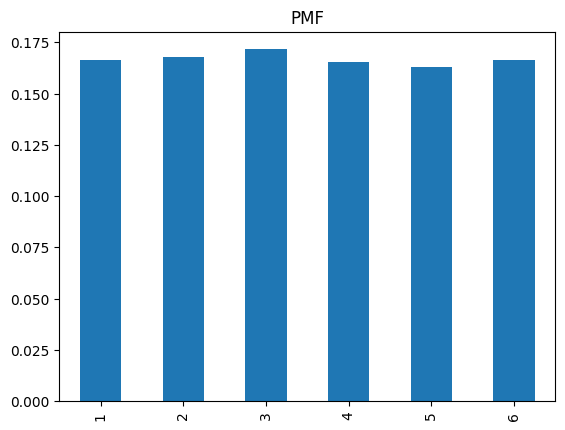

In [7]:
s.plot(kind="bar",title="PMF")

In [8]:
L1=[]
for i in range(10000):
    a=random.randint(1,6)
    b=random.randint(1,6)
    L1.append(a+b)

In [9]:
L1[:5]

[6, 8, 7, 5, 10]

In [10]:
s1=(pd.Series(L1).value_counts()/pd.Series(L1).value_counts().sum()).sort_index()
print(s1)

2     0.0278
3     0.0540
4     0.0846
5     0.1082
6     0.1421
7     0.1649
8     0.1426
9     0.1111
10    0.0845
11    0.0543
12    0.0259
Name: count, dtype: float64


<Axes: title={'center': 'PMF'}>

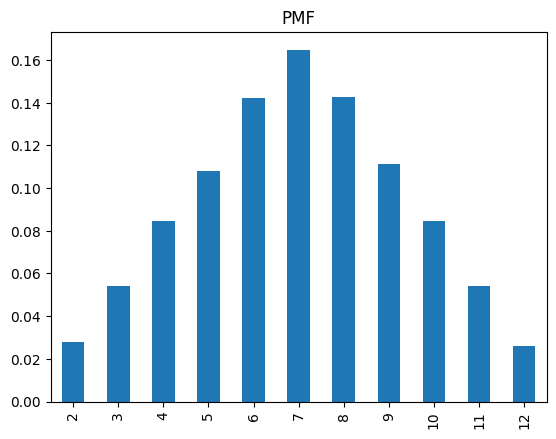

In [11]:
s1.plot(kind="bar",title="PMF")

In [12]:
import numpy as np

<Axes: title={'center': 'Cummulative PMF'}>

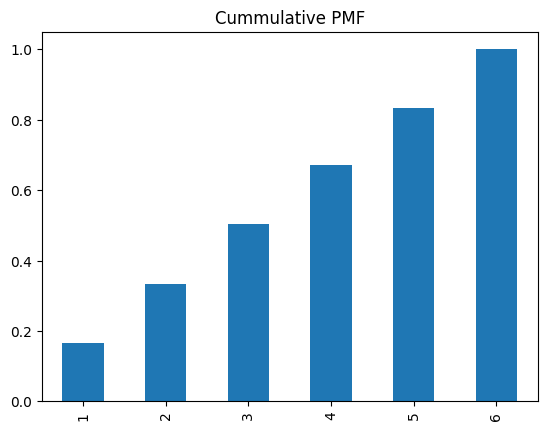

In [13]:
np.cumsum(s)
np.cumsum(s).plot(kind="bar",title="Cummulative PMF")

<Axes: title={'center': 'Cummulative PMF'}>

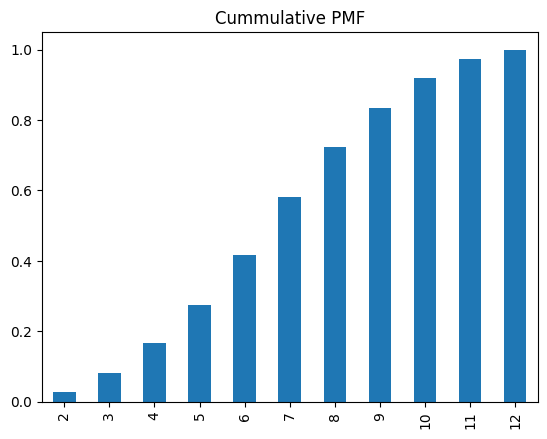

In [14]:
np.cumsum(s1)
np.cumsum(s1).plot(kind="bar",title="Cummulative PMF")

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [16]:
L2=np.random.randint(0,100,10000)

In [17]:
m=np.mean(L2)
sd=np.std(L2)
a=math.sqrt(2)


In [18]:
CDF = []
for i in range(10000):
    err_f = math.erf((L2[i] - m) / (sd * a))
    cdf = 0.5 * (1 + err_f)
    CDF.append(cdf)

(array([0.01242424, 0.00993939, 0.00890909, 0.01121212, 0.00909091,
        0.00878788, 0.01339394, 0.00912121, 0.00909091, 0.00924242,
        0.01236364, 0.00921212, 0.0090303 , 0.01230303, 0.00860606,
        0.00869697, 0.01193939, 0.00939394, 0.00906061, 0.00827273,
        0.01172727, 0.00909091, 0.00930303, 0.01084848, 0.0089697 ,
        0.00939394, 0.01266667, 0.00942424, 0.00884848, 0.01266667]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ,
        36.3, 39.6, 42.9, 46.2, 49.5, 52.8, 56.1, 59.4, 62.7, 66. , 69.3,
        72.6, 75.9, 79.2, 82.5, 85.8, 89.1, 92.4, 95.7, 99. ]),
 <BarContainer object of 30 artists>)

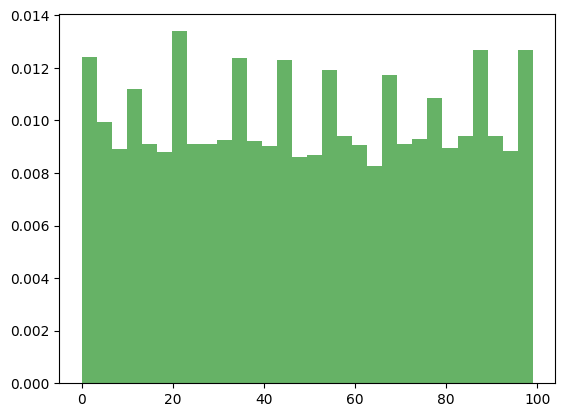

In [19]:
plt.hist(L2, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

TypeError: _parse_args() takes from 1 to 3 positional arguments but 4 were given

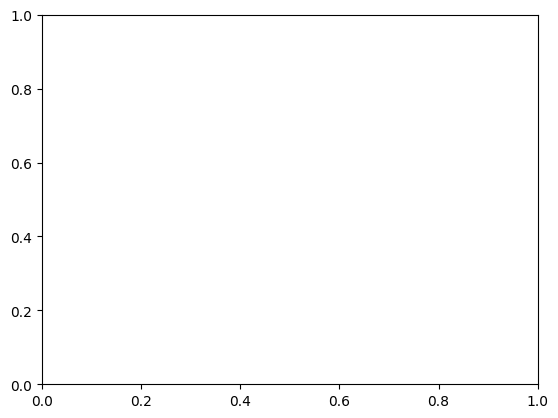

In [20]:
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm(x,m,sd)
plt.plot(x,p,'k',linewidth=2,label="Normal Distribution")

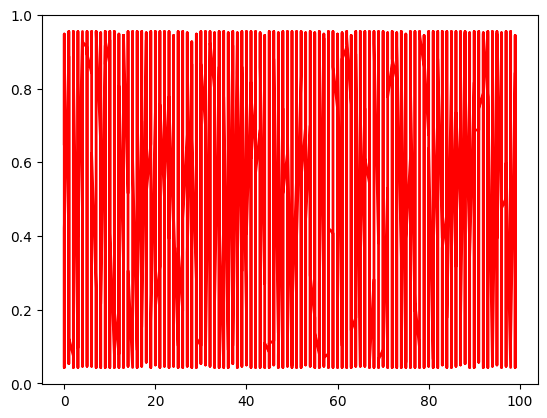

In [ ]:
plt.plot(sorted(L2), CDF, 'r-', linewidth=2, label='CDF')

In [21]:
from numpy.random import normal

Parametric Density Estimation


In [22]:
sample=normal(loc=50,scale=5,size=1000)

In [103]:
sample.mean()
print(sample.std())

5.093482518964194


(array([ 10.,  47.,  88., 158., 224., 222., 143.,  71.,  27.,  10.]),
 array([35.54535773, 38.49528573, 41.44521373, 44.39514173, 47.34506973,
        50.29499772, 53.24492572, 56.19485372, 59.14478172, 62.09470972,
        65.04463772]),
 <BarContainer object of 10 artists>)

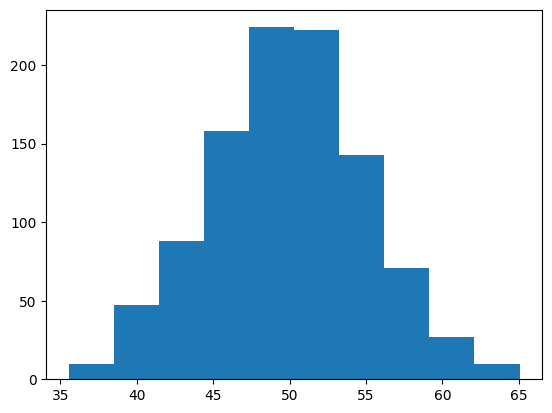

In [24]:
plt.hist(sample,bins=10)

In [25]:
sample_mean=sample.mean()
sample_std=sample.std()

In [26]:
dist=norm(sample_mean,sample_std)

In [27]:
values=np.linspace(sample.min(),sample.max(),100)

In [28]:
sample.max()

65.04463771775507

In [29]:
probabilities=[dist.pdf(value) for value in values]

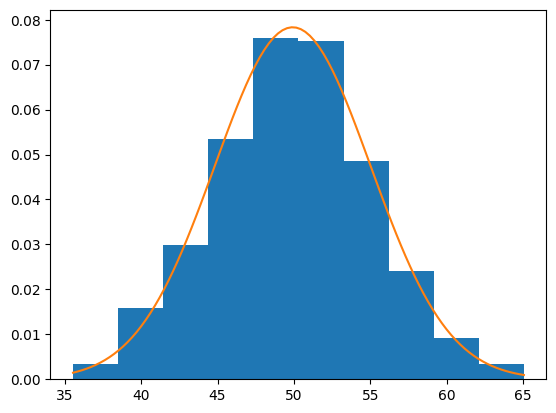

In [30]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\vrajd\AppData\Local\Temp\ipykernel_21072\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

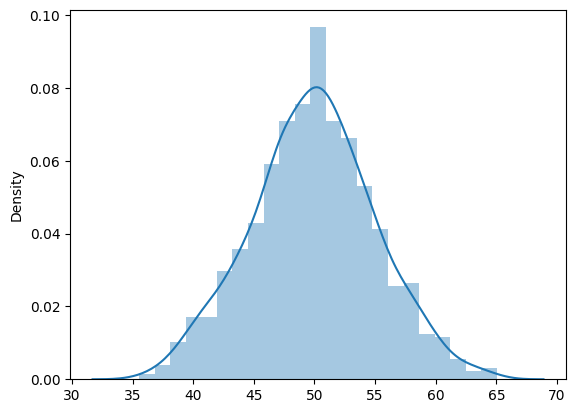

In [31]:
import seaborn as sns
sns.distplot(sample)

In [32]:
sample2=normal(loc=100,scale=50,size=100)

In [33]:
sample2.mean()

105.04350488227489

In [34]:
sample2.std()

47.36811243155532

(array([ 5.,  9., 13., 18., 12., 10., 17.,  8.,  4.,  4.]),
 array([ 11.1837886 ,  31.46793845,  51.7520883 ,  72.03623815,
         92.320388  , 112.60453786, 132.88868771, 153.17283756,
        173.45698741, 193.74113726, 214.02528711]),
 <BarContainer object of 10 artists>)

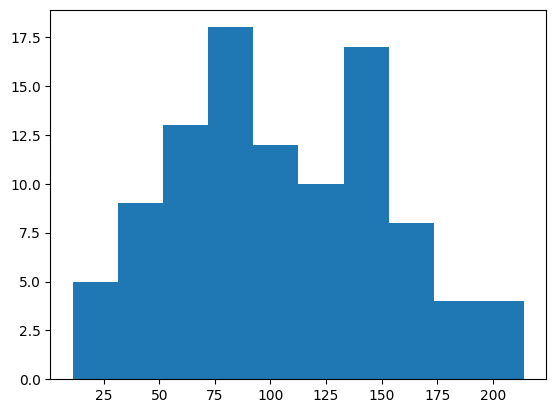

In [35]:
plt.hist(sample2)

In [36]:
sample2_mean=sample2.mean()
sample2_std=sample2.std()

In [37]:
dist2=norm(sample2_mean,sample2_std)

In [38]:
values2=np.linspace(sample2.min(),sample2.max(),10)
print(values2)

[ 11.1837886   33.72173288  56.25967716  78.79762144 101.33556572
 123.87351    146.41145428 168.94939855 191.48734283 214.02528711]


In [39]:
probabilities2=[dist2.pdf(value) for value in values2]
sum=0


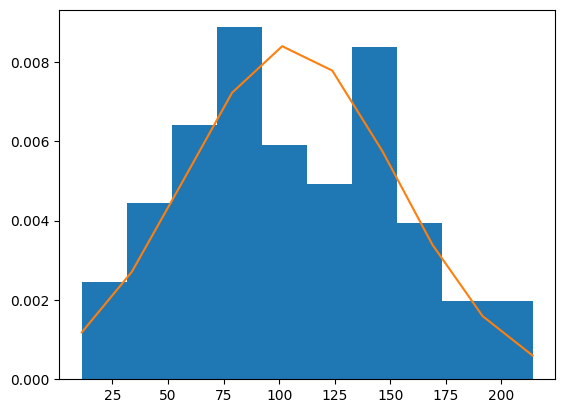

In [40]:
plt.hist(sample2,density=True)
plt.plot(values2,probabilities2)

C:\Users\vrajd\AppData\Local\Temp\ipykernel_7548\3394060466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample2)


<Axes: ylabel='Density'>

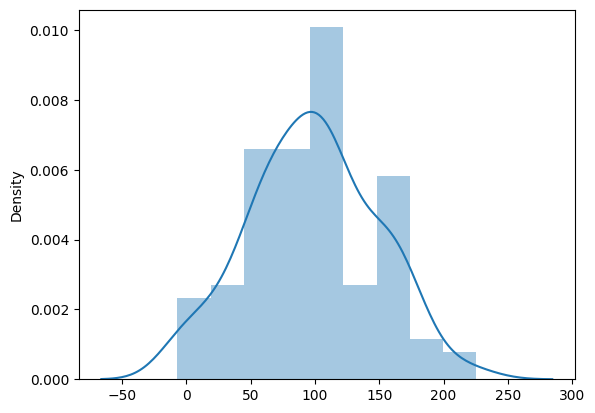

In [ ]:
sns.distplot(sample2)

Kernel Density Estimation

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  3.,  0.,  3.,  2.,  2.,
         5.,  4.,  2., 11.,  8.,  2.,  4.,  4., 16., 10., 10., 16.,  8.,
         8.,  9., 12., 10., 13., 10., 14.,  5.,  9., 10.,  9., 10.,  6.,
         8.,  8.,  6.,  7.,  8.,  4.,  5.,  3.,  4.,  5.,  8.,  4.,  8.,
         1., 13.,  8.,  6., 13., 17., 14., 12., 12., 20., 19., 23., 33.,
        16., 22., 31., 24., 21., 36., 23., 22., 26., 22., 29., 25., 19.,
        21., 22., 10., 14., 11., 11., 16., 12.,  8., 11.,  7.,  5.,  3.,
         5.,  1.,  6.,  3.,  2.,  1.,  3.,  1.,  3.]),
 array([ 5.76660328,  6.24663167,  6.72666007,  7.20668847,  7.68671687,
         8.16674527,  8.64677366,  9.12680206,  9.60683046, 10.08685886,
        10.56688726, 11.04691565, 11.52694405, 12.00697245, 12.48700085,
        12.96702925, 13.44705764, 13.92708604, 14.40711444, 14.88714284,
        15.36717124, 15.84719963, 16.32722803, 16.80725643, 17.28728483,
        17.76731323, 18.24734162, 18.72737002, 19.20739842, 19.687426

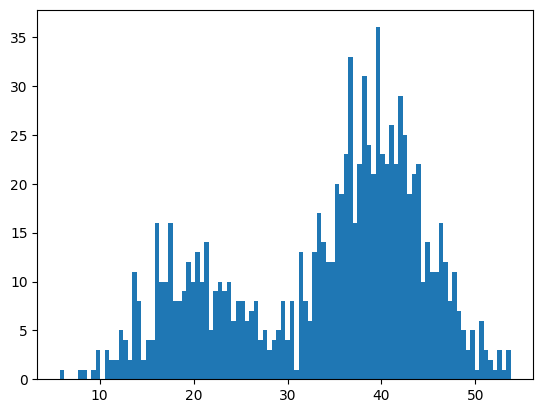

In [41]:
sample_1=normal(loc=20,scale=5,size=300)
sample_2=normal(loc=40,scale=5,size=700)

sample_kde=np.hstack((sample_1,sample_2))

plt.hist(sample_kde,bins=100)

In [42]:
from sklearn.neighbors import KernelDensity

model=KernelDensity(bandwidth=3,kernel="gaussian")

In [43]:
sample_kde=sample_kde.reshape((len(sample_kde),1))

In [44]:
model.fit(sample_kde)

KernelDensity(bandwidth=3)

In [45]:
values=np.linspace(sample_kde.min(),sample_kde.max(),100)
values=values.reshape((len(values),1))

In [46]:
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

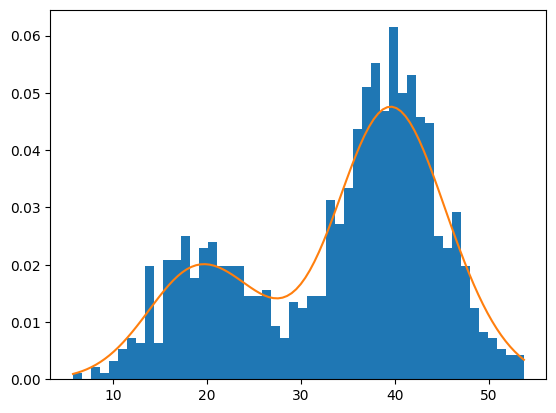

In [47]:
plt.hist(sample_kde,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

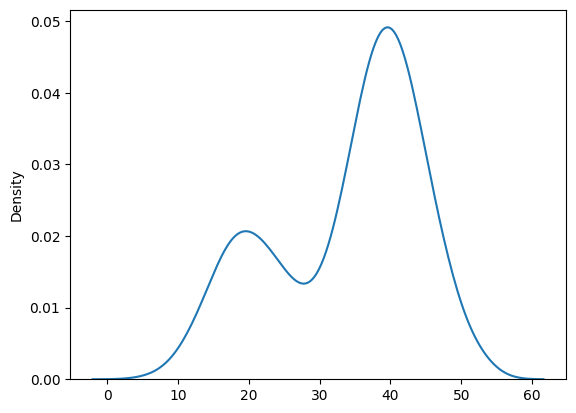

In [48]:
sns.kdeplot(sample_kde.reshape(1000),bw_adjust=1)
# more bandwidths more  spikes as spread area reduces

2D Probability Density plots

In [49]:
df=sns.load_dataset('iris')

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


<Axes: xlabel='sepal_length', ylabel='Density'>

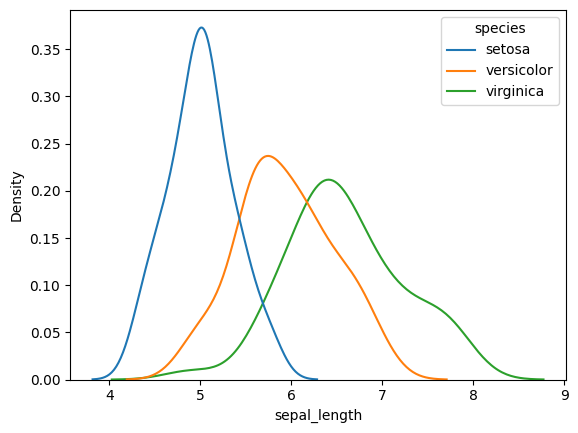

In [52]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

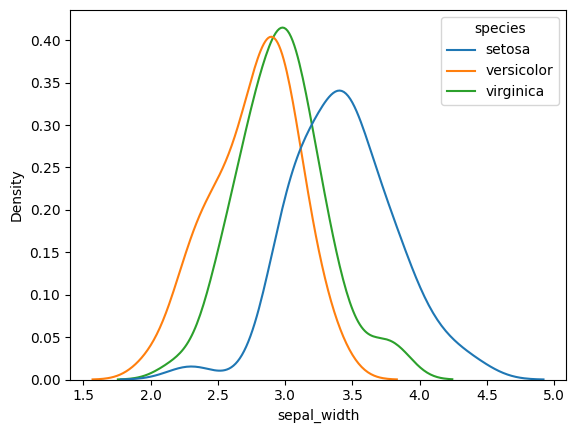

In [53]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

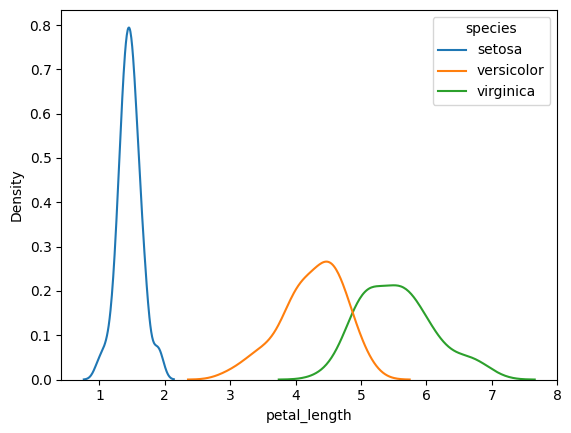

In [54]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

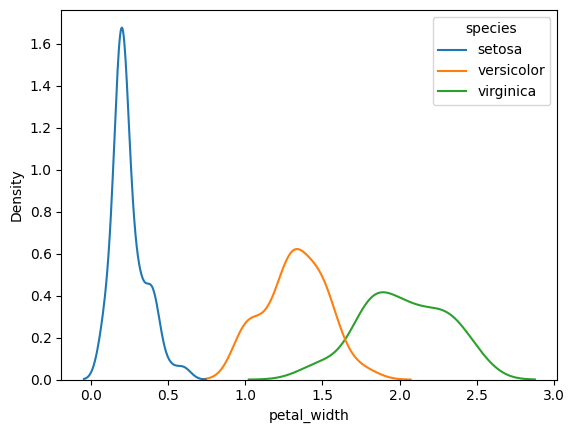

In [55]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

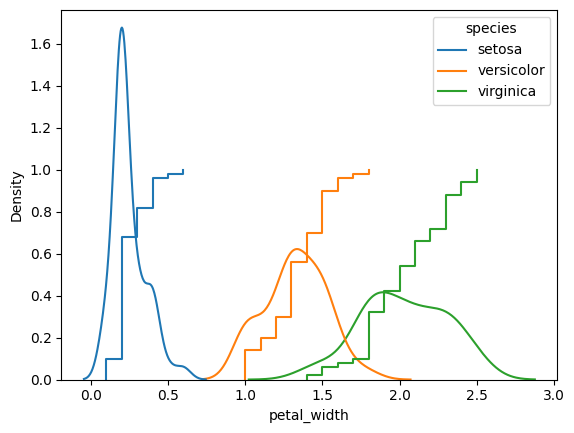

In [56]:
sns.kdeplot(data=df,x='petal_width',hue='species')


<Axes: xlabel='petal_width', ylabel='Proportion'>

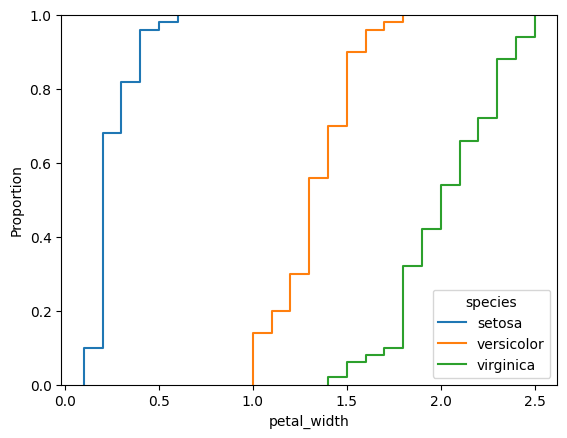

In [97]:
sns.ecdfplot(data=df,x="petal_width",hue='species')

In [57]:
titanic=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

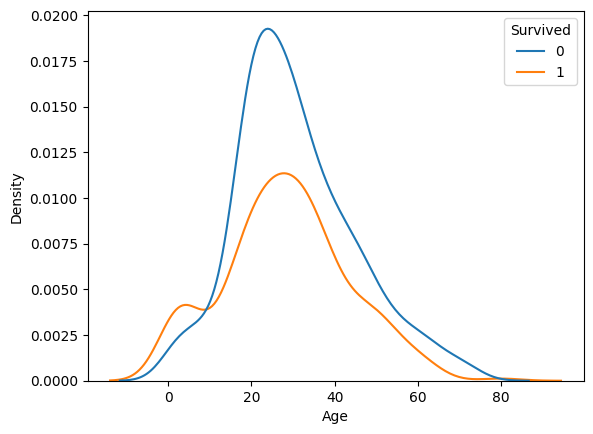

In [95]:
sns.kdeplot(data=titanic,x='Age',hue='Survived')


<Axes: xlabel='Age', ylabel='Proportion'>

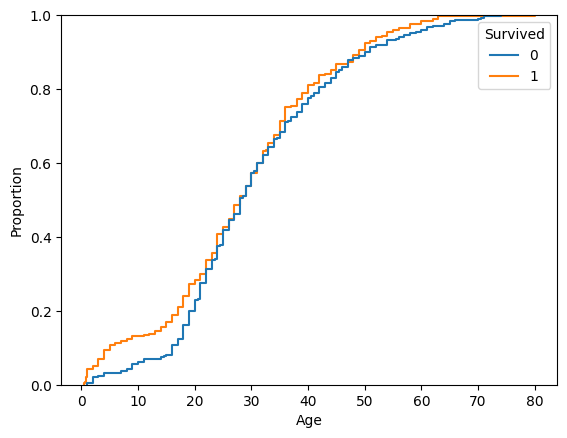

In [96]:
sns.ecdfplot(data=titanic,x="Age",hue="Survived")

2D density plots


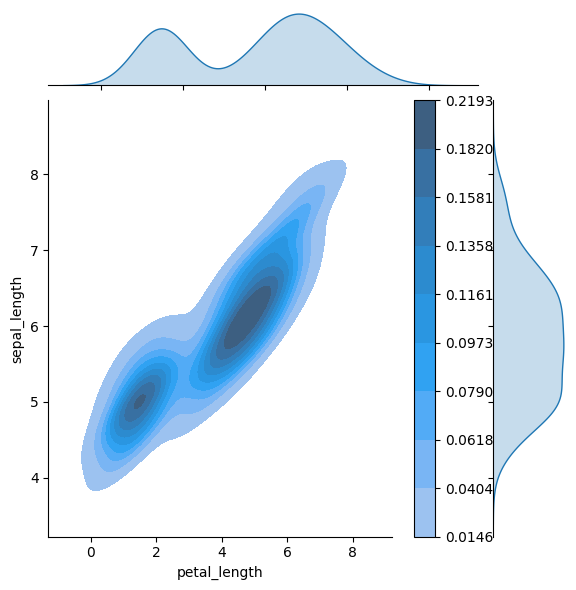

In [98]:
sns.jointplot(data=df,x="petal_length",y="sepal_length",kind="kde",fill=True,cbar=True)
# Imagine as Pahad 3D 

<Axes: xlabel='sepal_length', ylabel='Density'>

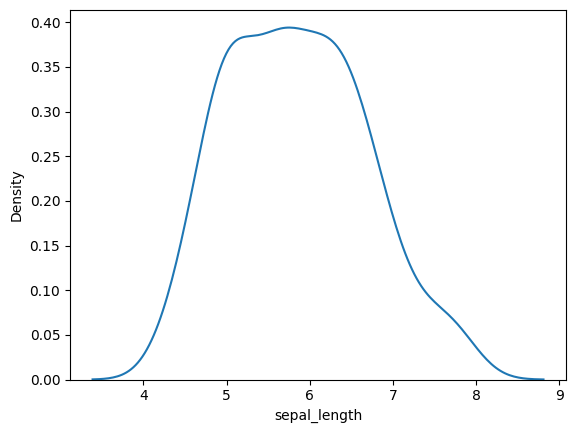

In [99]:
sns.kdeplot(data=df,x="sepal_length")

<Axes: xlabel='petal_length', ylabel='Density'>

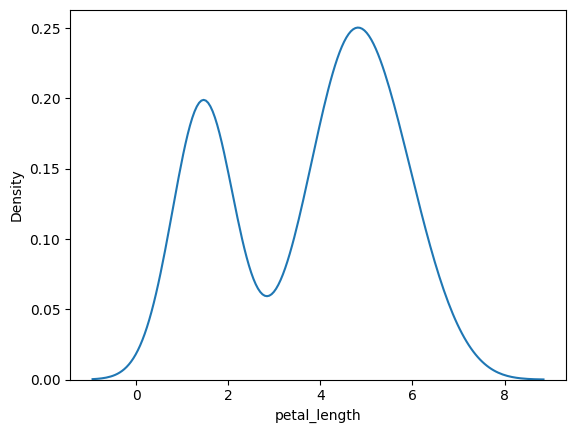

In [100]:
sns.kdeplot(data=df,x="petal_length")